# LUMINEX——pYAP, pABL, and pSRC DASATINIB DOSE RESPONSE 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# New vs Old MEK kit and lysis buffer test

Text(0.5, 0.98, 'PC9 WT (.42ug/ul, 30uL)')

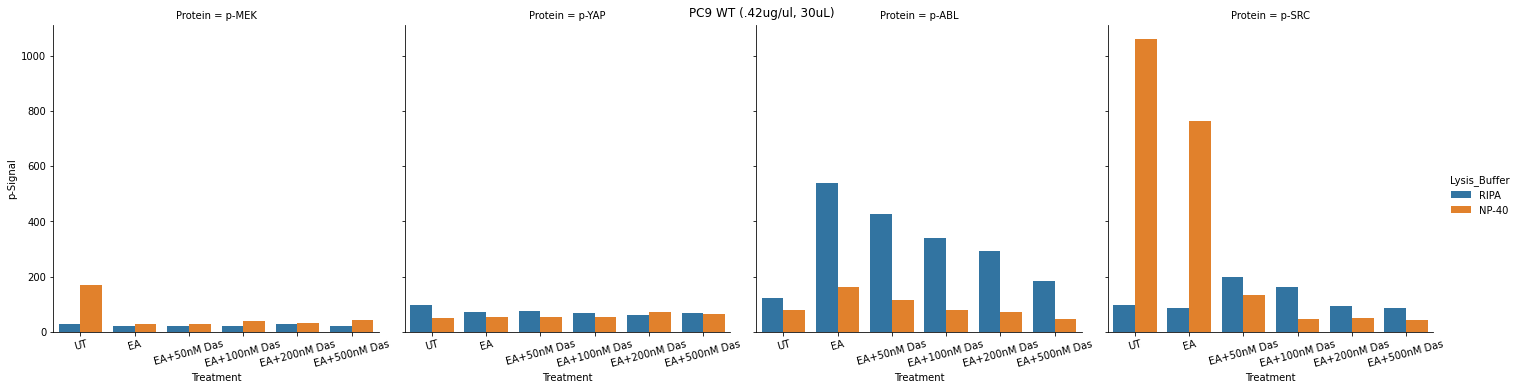

In [20]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_newMEK_lysisbuffer.csv")
mfi = pd.melt(mfi, id_vars=["Treatment", "Line", "Lysis_Buffer"], value_vars=["p-MEK", "p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

mfi_wt = mfi[mfi["Line"] == "WT"]
ax = sns.catplot(data=mfi_wt, x="Treatment", y="p-Signal", hue="Lysis_Buffer", col="Protein", kind="bar")
ax.set_xticklabels(rotation=15)
ax.fig.suptitle('PC9 WT (.42ug/ul, 30uL)')

Text(0.5, 0.98, 'PC9 AXL KO (.42ug/ul, 30uL)')

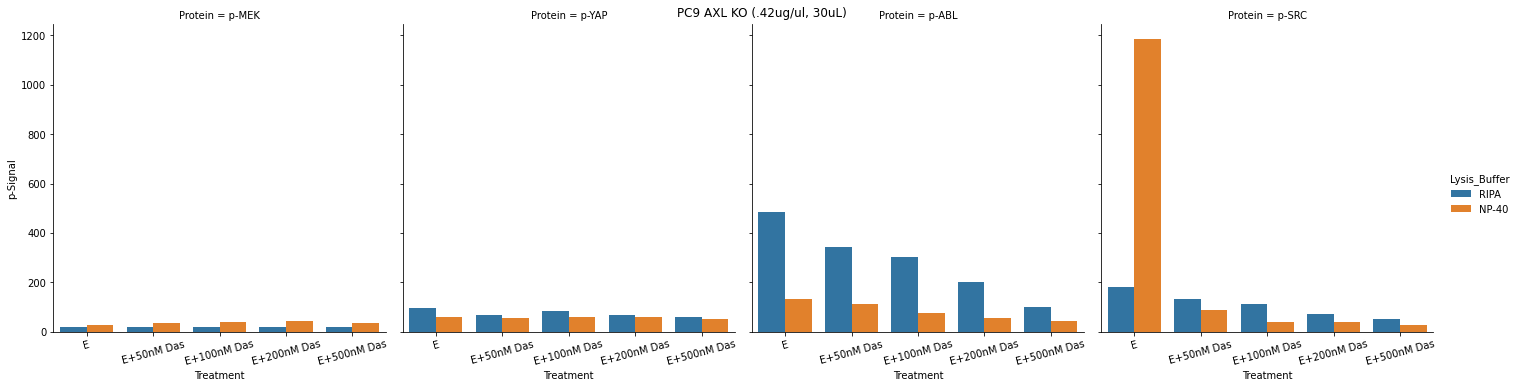

In [22]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_newMEK_lysisbuffer.csv")
mfi = pd.melt(mfi, id_vars=["Treatment", "Line", "Lysis_Buffer"], value_vars=["p-MEK", "p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

mfi_wt = mfi[mfi["Line"] == "KO"]
ax = sns.catplot(data=mfi_wt, x="Treatment", y="p-Signal", hue="Lysis_Buffer", col="Protein", kind="bar")
ax.set_xticklabels(rotation=15)
ax.fig.suptitle('PC9 AXL KO (.42ug/ul, 30uL)')

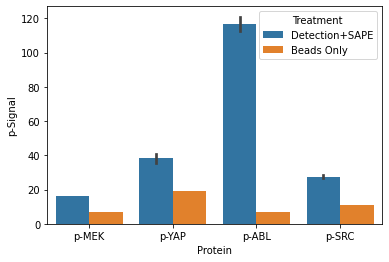

In [7]:
d = mfi[mfi["Line"] == "Background"]
ax = sns.barplot(data=d, x="Protein", y="p-Signal", hue="Treatment")

# pYAP 127 Detection test
### Notes: NP-40 KO E, 200, 500 and RIPA KO E and WT 500 slightly amount of protein 

Text(0.5, 0.98, 'PC9 WT (.49ug/ul, 20uL)')

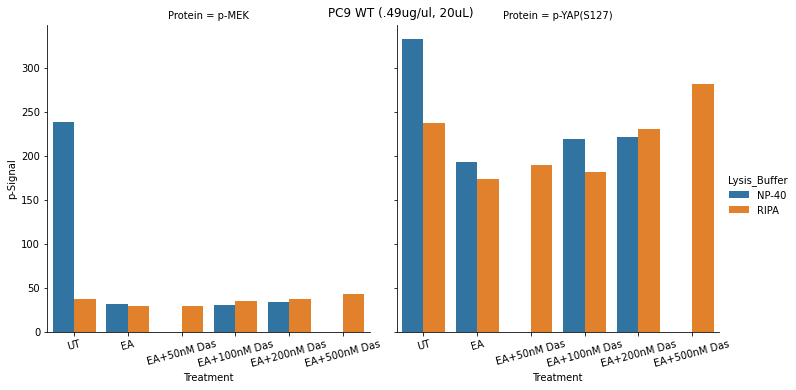

In [5]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_pYAP127_check.csv")
mfi = pd.melt(mfi, id_vars=["Treatment", "Line", "Lysis_Buffer"], value_vars=["p-MEK", "p-YAP(S127)"], var_name="Protein", value_name="p-Signal")

mfi_wt = mfi[mfi["Line"] == "WT"]
ax = sns.catplot(data=mfi_wt, x="Treatment", y="p-Signal", hue="Lysis_Buffer", col="Protein", kind="bar")
ax.set_xticklabels(rotation=15)
ax.fig.suptitle('PC9 WT (.49ug/ul, 20uL)')

Text(0.5, 0.98, 'PC9 KO (.49ug/ul, 20uL)')

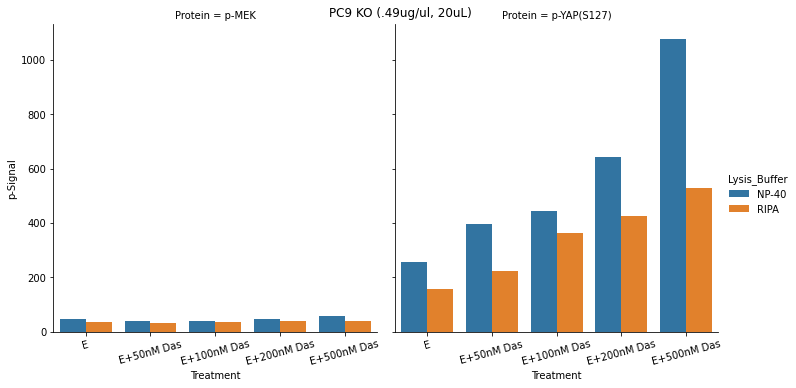

In [9]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_pYAP127_check.csv")
mfi = pd.melt(mfi, id_vars=["Treatment", "Line", "Lysis_Buffer"], value_vars=["p-MEK", "p-YAP(S127)"], var_name="Protein", value_name="p-Signal")

mfi_wt = mfi[mfi["Line"] == "KO"]
ax = sns.catplot(data=mfi_wt, x="Treatment", y="p-Signal", hue="Lysis_Buffer", col="Protein", kind="bar")
ax.set_xticklabels(rotation=15)
ax.fig.suptitle('PC9 KO (.49ug/ul, 20uL)')

Text(0.5, 0.98, 'Background Signal')

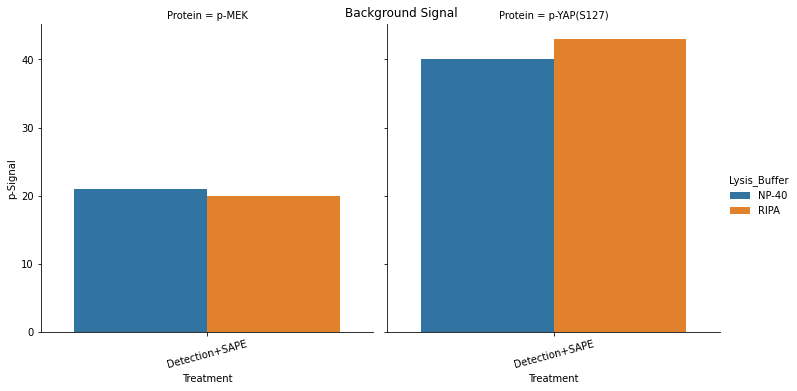

In [8]:
mfi = pd.read_csv("msresist/data/Validations/Luminex/DasatinibDR_pYAP127_check.csv")
mfi = pd.melt(mfi, id_vars=["Treatment", "Line", "Lysis_Buffer"], value_vars=["p-MEK", "p-YAP(S127)"], var_name="Protein", value_name="p-Signal")

mfi_wt = mfi[mfi["Line"] == "Background"]
ax = sns.catplot(data=mfi_wt, x="Treatment", y="p-Signal", hue="Lysis_Buffer", col="Protein", kind="bar")
ax.set_xticklabels(rotation=15)
ax.fig.suptitle('Background Signal')